# **Data Analysis**

### Imports

In [42]:
# Imports
import os
import librosa
import numpy as np
import soundfile as sf
from scipy.signal import fftconvolve

import matplotlib.pyplot as plt
from matplotlib import ticker

import librosa.display
import numpy as np


### Defining Functions

In [43]:
# Function to generate a normalized Mel-spectrogram
def generate_mel_spectrogram(audio_path):
    audio, sr = librosa.load(audio_path, sr=None)
    stft = librosa.stft(audio, n_fft=1024, hop_length=512)
    mel = librosa.feature.melspectrogram(S=np.abs(stft)**2, sr=sr, n_mels=128)
    mel_db = librosa.power_to_db(mel, ref=np.max)
    # Normalize to [0, 1]
    mel_db_norm = (mel_db - mel_db.min()) / (mel_db.max() - mel_db.min())
    return mel_db_norm, sr

In [44]:
# Function to generate overlapping frames from a Mel-spectrogram
def generate_frames(mel_spectrogram, frame_size, hop_size):
    num_frames = (mel_spectrogram.shape[1] - frame_size) // hop_size + 1
    frames = np.zeros((num_frames, mel_spectrogram.shape[0], frame_size))
    for i in range(num_frames):
        start = i * hop_size
        frames[i] = mel_spectrogram[:, start:start + frame_size]
    return frames

In [45]:
# Adjustable parameters
time_per_frame = 0.6  # Duration of one frame in seconds
hop_ratio = 0.2       # Overlap ratio between frames

In [46]:
# Function to visualize a subset of frames for inspection
def plot_frames(frames, num_frames=5, title_prefix="Frame"):
    num_frames = min(num_frames, len(frames))
    fig, axes = plt.subplots(1, num_frames, figsize=(15, 5))
    for i in range(num_frames):
        ax = axes[i] if num_frames > 1 else axes
        img = librosa.display.specshow(frames[i], x_axis=None, y_axis="mel", cmap="viridis", ax=ax)
        ax.set_title(f"{title_prefix} {i+1}")
        ax.axis("off")
    plt.tight_layout()
    plt.show()

## **"13 Washing Machine"**

### Load Dataset

In [47]:
# Paths to audio files
anomalous_audio_path_wm = "../../Data/raw/13_washing_machine/A_WM.wav"
normal_audio_path_wm = "../../Data/raw/13_washing_machine/N_WM.wav"

# Paths for saving frames and datasets
output_anomalous_frames_path = "../../Data/frames/analysis_anomalous_frames_13_washing_machine.npy"
output_normal_frames_path = "../../Data/frames/analysis_normal_frames_13_washing_machine.npy"

# Ensure necessary directories exist
os.makedirs(os.path.dirname(output_anomalous_frames_path), exist_ok=True)

### Generate Mel-Spectrogram

In [48]:
# Generate Mel-spectrograms
mel_anomaly_13_washing_machine, sr_anomaly_13_washing_machine = generate_mel_spectrogram(anomalous_audio_path_wm)
mel_normal_13_washing_machine, sr_normal_13_washing_machine = generate_mel_spectrogram(normal_audio_path_wm)

In [49]:
# Ensure sampling rates match
assert sr_anomaly_13_washing_machine == sr_normal_13_washing_machine, "Sampling rates do not match!"

### Generate Frames from Mel-Spectrogram

In [50]:
# Calculate frame and hop sizes
hop_length = 512
frame_size = int((time_per_frame * sr_anomaly_13_washing_machine) / hop_length)
hop_size = int(frame_size * hop_ratio)

In [51]:
# Generate frames
frames_anomaly_13_washing_machine = generate_frames(mel_anomaly_13_washing_machine, frame_size, hop_size)
frames_normal_13_washing_machine = generate_frames(mel_normal_13_washing_machine, frame_size, hop_size)

In [52]:
# Save frames
np.save(output_anomalous_frames_path, frames_anomaly_13_washing_machine)
np.save(output_normal_frames_path, frames_normal_13_washing_machine)

### Plotting

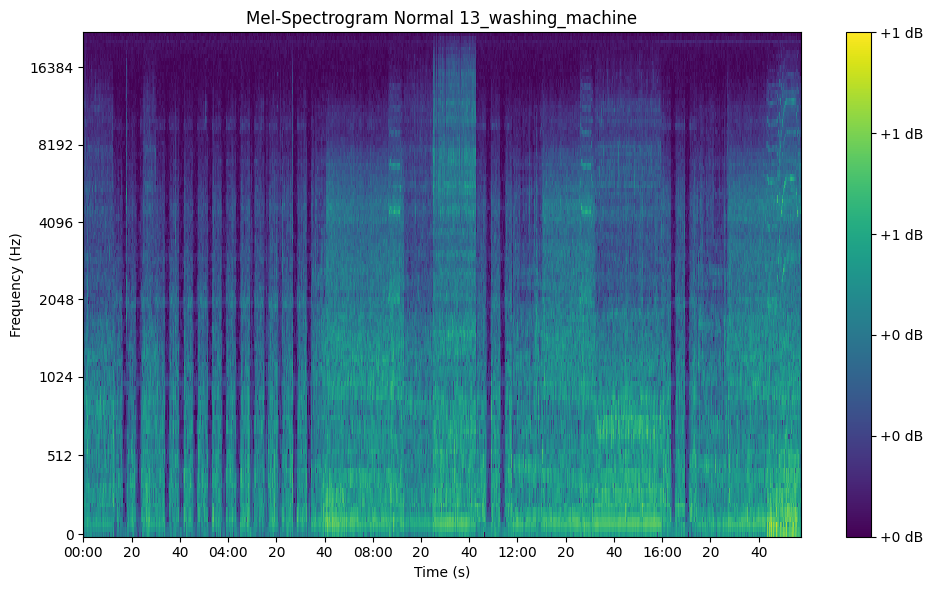

In [53]:
# Create a single plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Normal Mel-Spectrogram
img1 = librosa.display.specshow(mel_normal_13_washing_machine, sr=sr_normal_13_washing_machine, x_axis='time', y_axis='mel', cmap='viridis', ax=ax)
ax.set(title='Mel-Spectrogram Normal 13_washing_machine', xlabel='Time (s)', ylabel='Frequency (Hz)')

# Set the x-axis to display only specified part of spectrogram (in seconds)
# ax.set_xlim([14, 28])

# Define a custom function to format the x-axis labels with MM:SS only at the beginning of each minute
def format_time(x, pos):
    minutes = int(x // 60)
    seconds = int(x % 60)
    # Show "MM:SS" at the start of each new displayed minute, then only seconds
    if x == ax.get_xlim()[0] or seconds == 0:
        return f"{minutes:02d}:{seconds:02d}"
    else:
        return f"{seconds:02d}"

# Apply the formatter to the x-axis
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=15))  # Set 15 ticks
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_time))

# Set color bar for dB scale
fig.colorbar(img1, ax=ax, format='%+2.0f dB')

# Adjust layout
plt.tight_layout()
plt.savefig('../../Data/mel/mel_spectrogram_13_washing_machine_N.png')
plt.show()

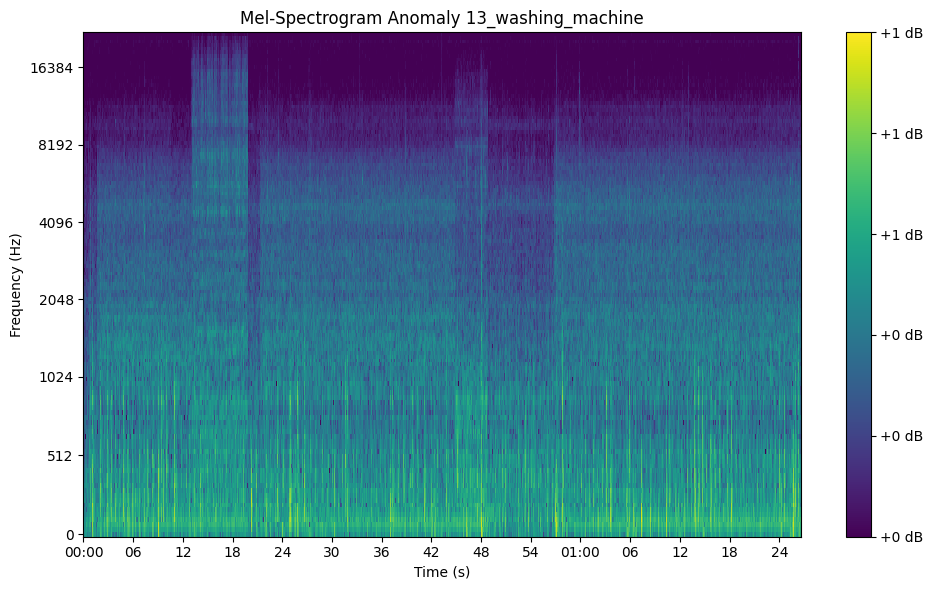

In [54]:
# Create a single plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Anomaly Mel-Spectrogram
img1 = librosa.display.specshow(mel_anomaly_13_washing_machine, sr=sr_anomaly_13_washing_machine, x_axis='time', y_axis='mel', cmap='viridis', ax=ax)
ax.set(title='Mel-Spectrogram Anomaly 13_washing_machine', xlabel='Time (s)', ylabel='Frequency (Hz)')

# Set the x-axis to display only specified part of spectrogram (in seconds)
# ax.set_xlim([14, 28])

# Define a custom function to format the x-axis labels with MM:SS only at the beginning of each minute
def format_time(x, pos):
    minutes = int(x // 60)
    seconds = int(x % 60)
    # Show "MM:SS" at the start of each new displayed minute, then only seconds
    if x == ax.get_xlim()[0] or seconds == 0:
        return f"{minutes:02d}:{seconds:02d}"
    else:
        return f"{seconds:02d}"

# Apply the formatter to the x-axis
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=15))  # Set 15 ticks
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_time))

# Set color bar for dB scale
fig.colorbar(img1, ax=ax, format='%+2.0f dB')

# Adjust layout
plt.tight_layout()
plt.savefig('../../Data/mel/mel_spectrogram_13_washing_machine_A.png')
plt.show()

Visualizing frames for anomalous sounds...


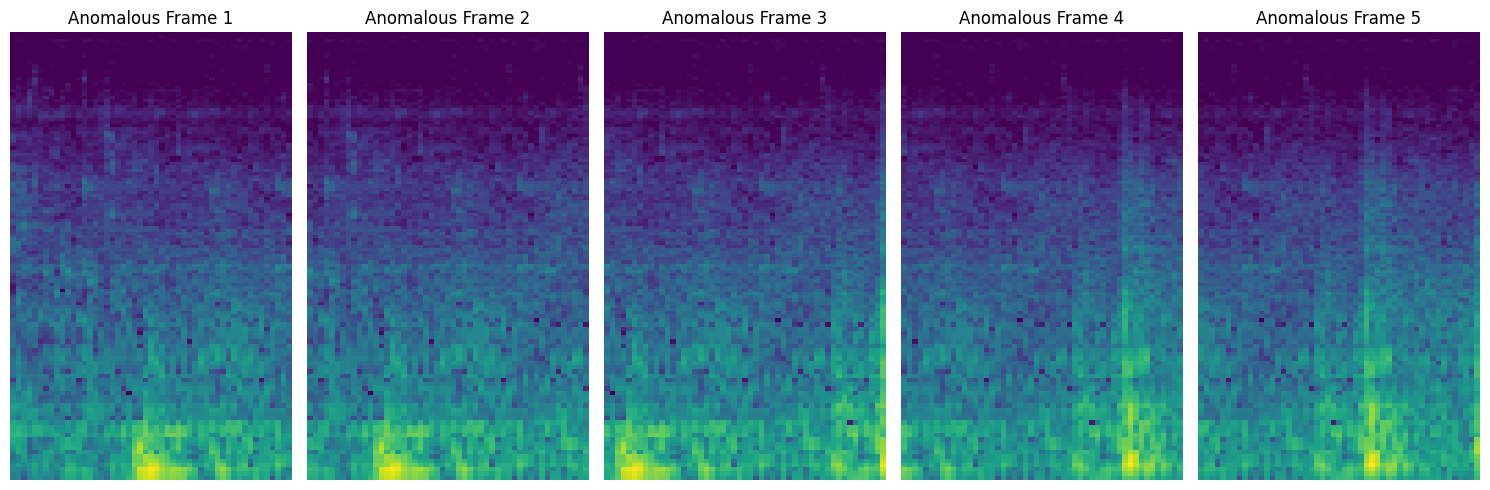

In [55]:
# Visualize anomalous frames
print("Visualizing frames for anomalous sounds...")
plot_frames(frames_anomaly_13_washing_machine, num_frames=5, title_prefix="Anomalous Frame")

Visualizing frames for normal sounds...


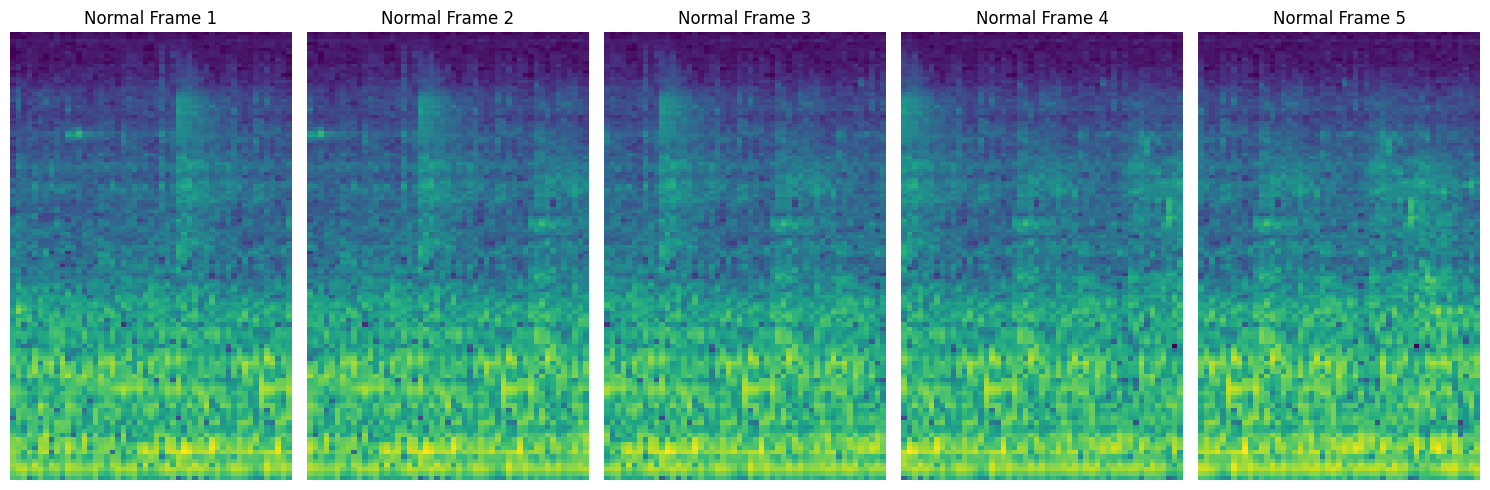

In [56]:
# Visualize normal frames
print("Visualizing frames for normal sounds...")
plot_frames(frames_normal_13_washing_machine, num_frames=5, title_prefix="Normal Frame")

## **"11 Synthetic Anomalies"**

### Load Dataset

In [57]:
# Paths to audio files
anomalous_audio_path_synthetic = "../../Data/raw/11_synthetic_anomalies/A_09_10_experiment7_8.wav"
normal_audio_path_synthetic = "../../Data/raw/11_synthetic_anomalies/N_09_experiment7.wav"
complete_audio_path_synthetic = "../../Data/raw/11_synthetic_anomalies/A_09_10_experiment7_8.wav"

# Paths for saving frames and datasets
output_anomalous_frames_path = "../../Data/frames/analysis_anomalous_frames_11_synthetic_anomalies.npy"
output_normal_frames_path = "../../Data/frames/analysis_normal_frames_11_synthetic_anomalies.npy"
output_complete_frames_path = "../../Data/frames/analysis_complete_frames_11_synthetic_anomalies.npy"

# Ensure necessary directories exist
os.makedirs(os.path.dirname(output_anomalous_frames_path), exist_ok=True)

### Generate Mel-Spectrogram

In [58]:
# Generate Mel-spectrograms
mel_complete_11_synthetic_anomalies, sr_complete_11_synthetic_anomalies = generate_mel_spectrogram(complete_audio_path_synthetic)
mel_anomaly_11_synthetic_anomalies, sr_anomaly_11_synthetic_anomalies = generate_mel_spectrogram(anomalous_audio_path_synthetic)
mel_normal_11_synthetic_anomalies, sr_normal_11_synthetic_anomalies = generate_mel_spectrogram(normal_audio_path_synthetic)

In [59]:
# Ensure sampling rates match
assert sr_anomaly_11_synthetic_anomalies == sr_normal_11_synthetic_anomalies, "Sampling rates do not match!"

### Generate Frames from Mel-Spectrogram

In [60]:
# Calculate frame and hop sizes
hop_length = 512
frame_size = int((time_per_frame * sr_anomaly_11_synthetic_anomalies) / hop_length)
hop_size = int(frame_size * hop_ratio)

In [61]:
# Generate frames
frames_anomaly_11_synthetic = generate_frames(mel_anomaly_11_synthetic_anomalies, frame_size, hop_size)
frames_normal_11_synthetic = generate_frames(mel_normal_11_synthetic_anomalies, frame_size, hop_size)

In [62]:
# Save frames
np.save(output_anomalous_frames_path, frames_anomaly_11_synthetic)
np.save(output_normal_frames_path, frames_normal_11_synthetic)

### Plotting

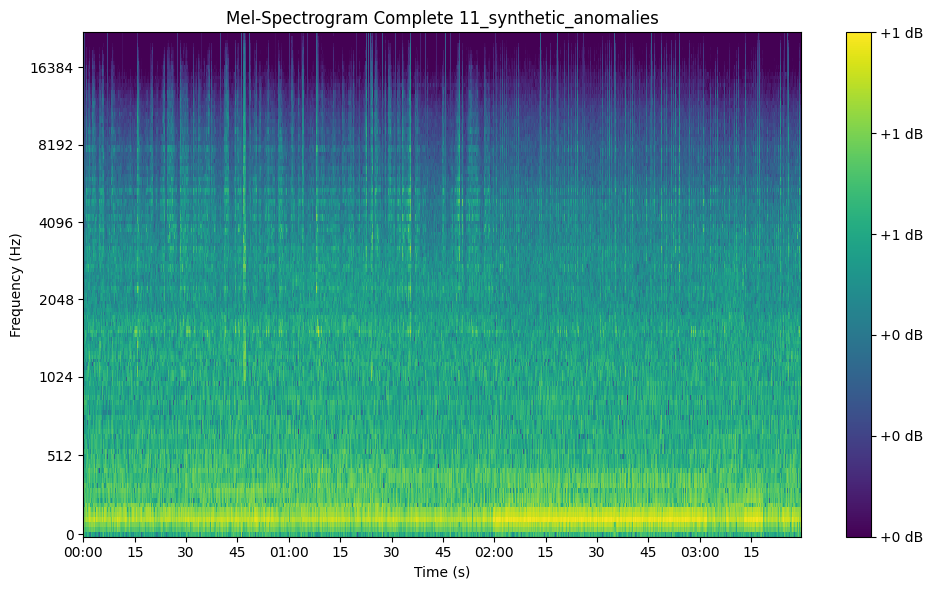

In [63]:
# Create a single plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Complete Mel-Spectrogram
img1 = librosa.display.specshow(mel_complete_11_synthetic_anomalies, sr=sr_complete_11_synthetic_anomalies, x_axis='time', y_axis='mel', cmap='viridis', ax=ax)
ax.set(title='Mel-Spectrogram Complete 11_synthetic_anomalies', xlabel='Time (s)', ylabel='Frequency (Hz)')

# Set the x-axis to display only specified part of spectrogram (in seconds)
# ax.set_xlim([14, 28])

# Define a custom function to format the x-axis labels with MM:SS only at the beginning of each minute
def format_time(x, pos):
    minutes = int(x // 60)
    seconds = int(x % 60)
    # Show "MM:SS" at the start of each new displayed minute, then only seconds
    if x == ax.get_xlim()[0] or seconds == 0:
        return f"{minutes:02d}:{seconds:02d}"
    else:
        return f"{seconds:02d}"

# Apply the formatter to the x-axis
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=15))  # Set 15 ticks
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_time))

# Set color bar for dB scale
fig.colorbar(img1, ax=ax, format='%+2.0f dB')

# Adjust layout
plt.tight_layout()
plt.savefig('../../Data/mel/mel_spectrogram_11_synthetic_anomalies_complete.png')
plt.show()

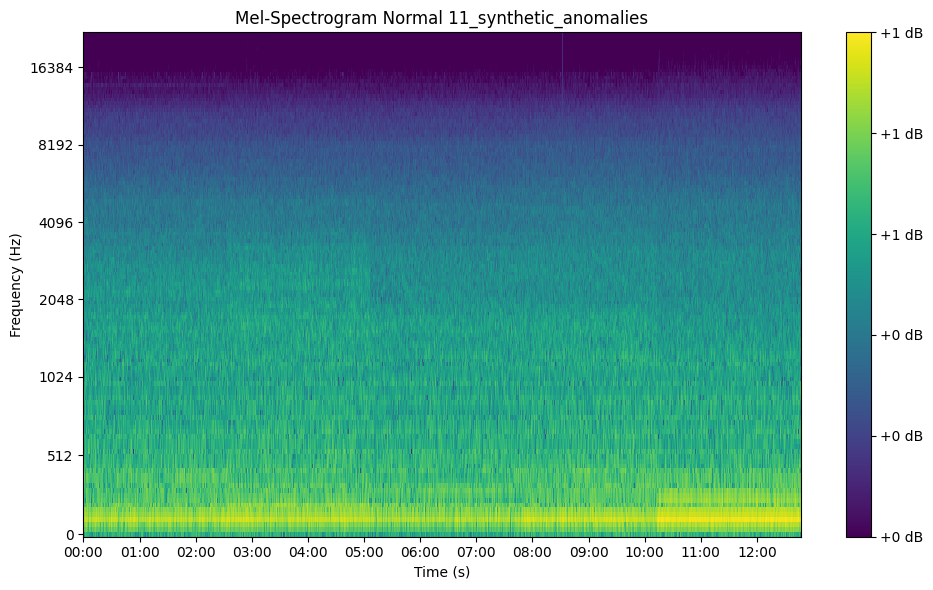

In [64]:
# Create a single plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Normal Mel-Spectrogram
img1 = librosa.display.specshow(mel_normal_11_synthetic_anomalies, sr=sr_normal_11_synthetic_anomalies, x_axis='time', y_axis='mel', cmap='viridis', ax=ax)
ax.set(title='Mel-Spectrogram Normal 11_synthetic_anomalies', xlabel='Time (s)', ylabel='Frequency (Hz)')

# Set the x-axis to display only specified part of spectrogram (in seconds)
# ax.set_xlim([14, 28])

# Define a custom function to format the x-axis labels with MM:SS only at the beginning of each minute
def format_time(x, pos):
    minutes = int(x // 60)
    seconds = int(x % 60)
    # Show "MM:SS" at the start of each new displayed minute, then only seconds
    if x == ax.get_xlim()[0] or seconds == 0:
        return f"{minutes:02d}:{seconds:02d}"
    else:
        return f"{seconds:02d}"

# Apply the formatter to the x-axis
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=15))  # Set 15 ticks
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_time))

# Set color bar for dB scale
fig.colorbar(img1, ax=ax, format='%+2.0f dB')

# Adjust layout
plt.tight_layout()
plt.savefig('../../Data/mel/mel_spectrogram_11_synthetic_anomalies_N.png')
plt.show()

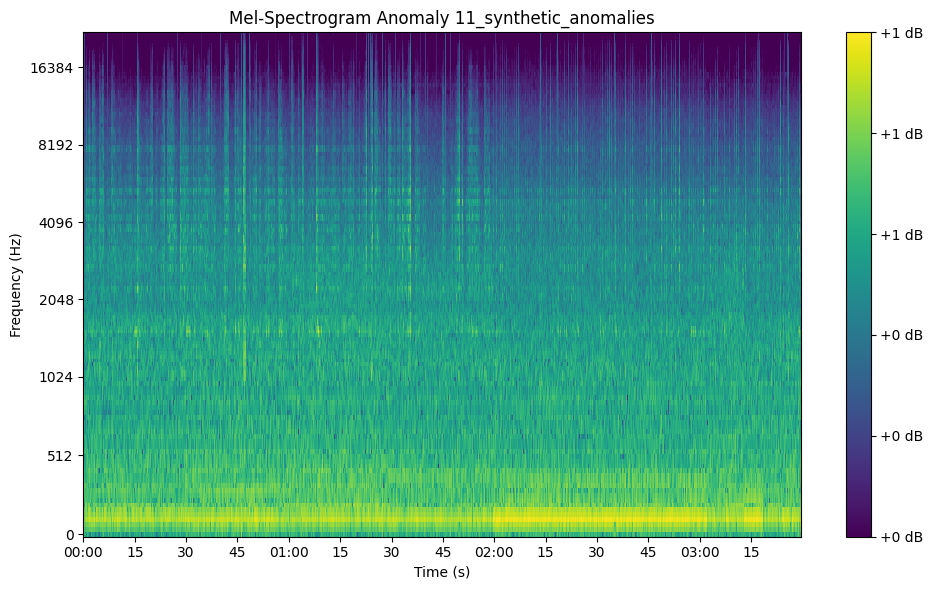

In [65]:
# Create a single plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Anomaly Mel-Spectrogram
img1 = librosa.display.specshow(mel_anomaly_11_synthetic_anomalies, sr=sr_anomaly_11_synthetic_anomalies, x_axis='time', y_axis='mel', cmap='viridis', ax=ax)
ax.set(title='Mel-Spectrogram Anomaly 11_synthetic_anomalies', xlabel='Time (s)', ylabel='Frequency (Hz)')

# Set the x-axis to display only specified part of spectrogram (in seconds)
# ax.set_xlim([14, 28])

# Define a custom function to format the x-axis labels with MM:SS only at the beginning of each minute
def format_time(x, pos):
    minutes = int(x // 60)
    seconds = int(x % 60)
    # Show "MM:SS" at the start of each new displayed minute, then only seconds
    if x == ax.get_xlim()[0] or seconds == 0:
        return f"{minutes:02d}:{seconds:02d}"
    else:
        return f"{seconds:02d}"

# Apply the formatter to the x-axis
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=15))  # Set 15 ticks
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_time))

# Set color bar for dB scale
fig.colorbar(img1, ax=ax, format='%+2.0f dB')

# Adjust layout
plt.tight_layout()
plt.savefig('../../Data/mel/mel_spectrogram_11_synthetic_anomalies_A.png')
plt.show()

Visualizing frames for anomalous sounds...


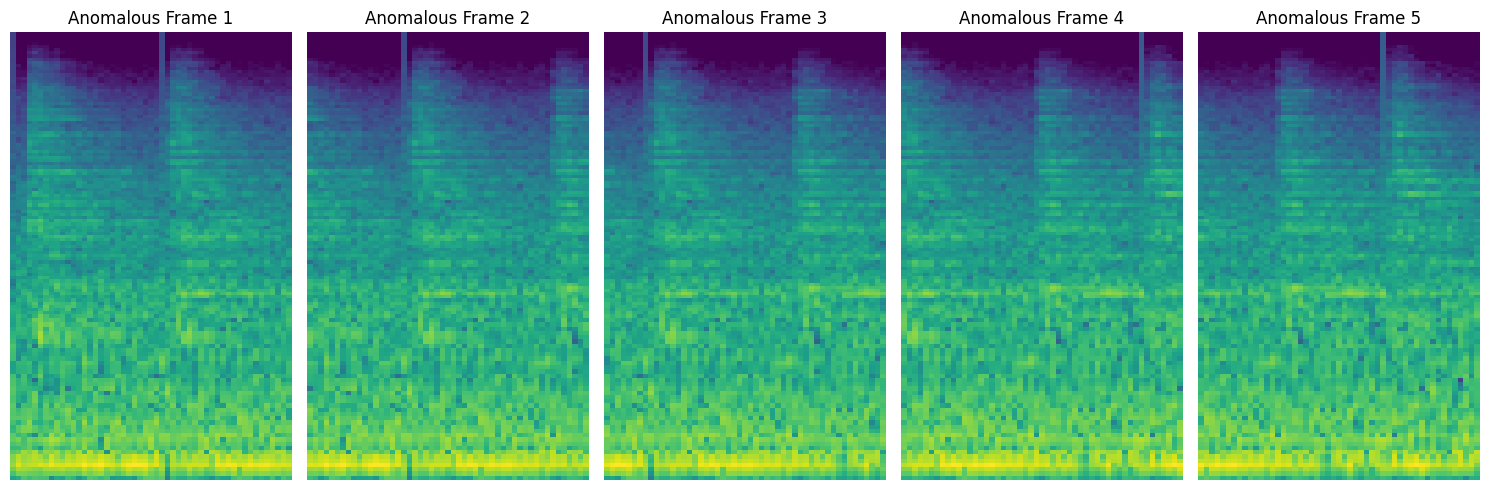

In [66]:
# Visualize anomalous frames
print("Visualizing frames for anomalous sounds...")
plot_frames(frames_anomaly_11_synthetic, num_frames=5, title_prefix="Anomalous Frame")

Visualizing frames for normal sounds...


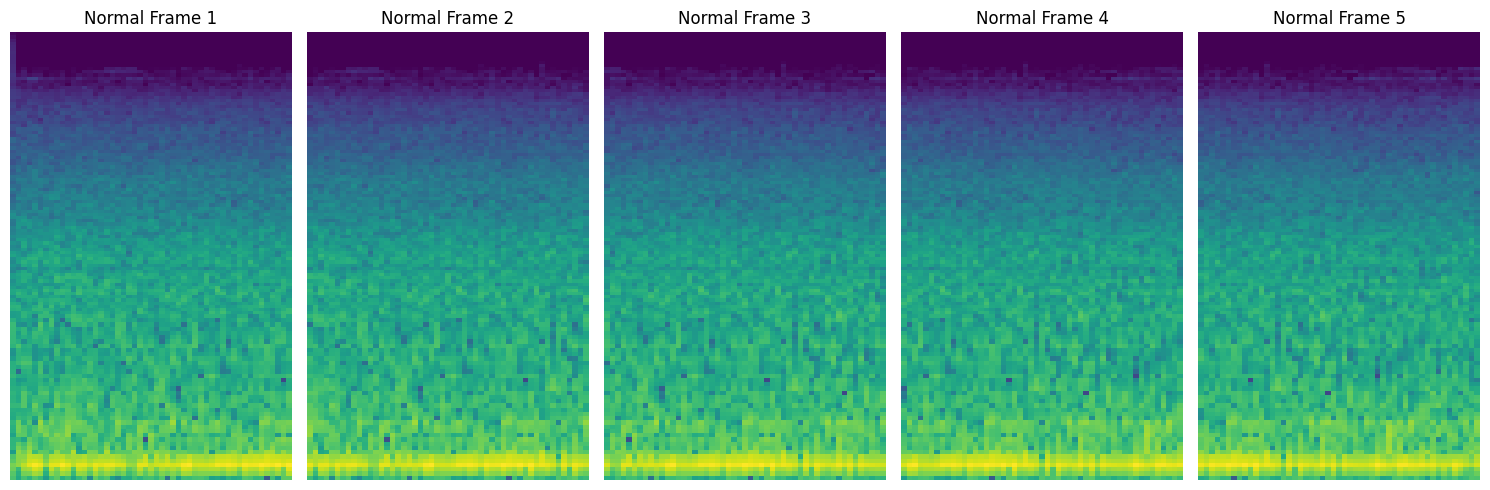

In [67]:
# Visualize normal frames
print("Visualizing frames for normal sounds...")
plot_frames(frames_normal_11_synthetic, num_frames=5, title_prefix="Normal Frame")

## **"12 Real Anomalies"**

### Load Dataset

In [68]:
# Paths to audio files
anomalous_audio_path_real = "../../Data/raw/11_synthetic_anomalies/A_09_10_experiment7_8.wav"
normal_audio_path_real = "../../Data/raw/11_synthetic_anomalies/N_09_experiment7.wav"
complete_audio_path_real = "../../Data/raw/08_livetest_anomalies/output_MIC1_2024-11-07_13-55-00_065414.wav"

# Paths for saving frames and datasets
output_anomalous_frames_path = "../../Data/frames/analysis_anomalous_frames_12_real_anomalies.npy"
output_normal_frames_path = "../../Data/frames/analysis_normal_frames_12_real_anomalies.npy"
output_complete_frames_path = "../../Data/frames/analysis_complete_frames_12_real_anomalies.npy"

# Ensure necessary directories exist
os.makedirs(os.path.dirname(output_anomalous_frames_path), exist_ok=True)

### Generate Mel-Spectrogram

In [69]:
# Generate Mel-spectrograms
mel_complete_12_real_anomalies, sr_complete_12_real_anomalies = generate_mel_spectrogram(complete_audio_path_real)
mel_anomaly_12_real_anomalies, sr_anomaly_12_real_anomalies = generate_mel_spectrogram(anomalous_audio_path_real)
mel_normal_12_real_anomalies, sr_normal_12_real_anomalies = generate_mel_spectrogram(normal_audio_path_real)

In [70]:
# Ensure sampling rates match
assert sr_anomaly_12_real_anomalies == sr_normal_12_real_anomalies, "Sampling rates do not match!"

### Generate Frames from Mel-Spectrogram

In [71]:
# Calculate frame and hop sizes
hop_length = 512
frame_size = int((time_per_frame * sr_anomaly_12_real_anomalies) / hop_length)
hop_size = int(frame_size * hop_ratio)

In [72]:
# Generate frames
frames_anomaly_12_real_anomalies = generate_frames(mel_anomaly_12_real_anomalies, frame_size, hop_size)
frames_normal_12_real_anomalies = generate_frames(mel_normal_12_real_anomalies, frame_size, hop_size)

In [73]:
# Save frames
np.save(output_anomalous_frames_path, frames_anomaly_12_real_anomalies)
np.save(output_normal_frames_path, frames_normal_12_real_anomalies)

### Plotting

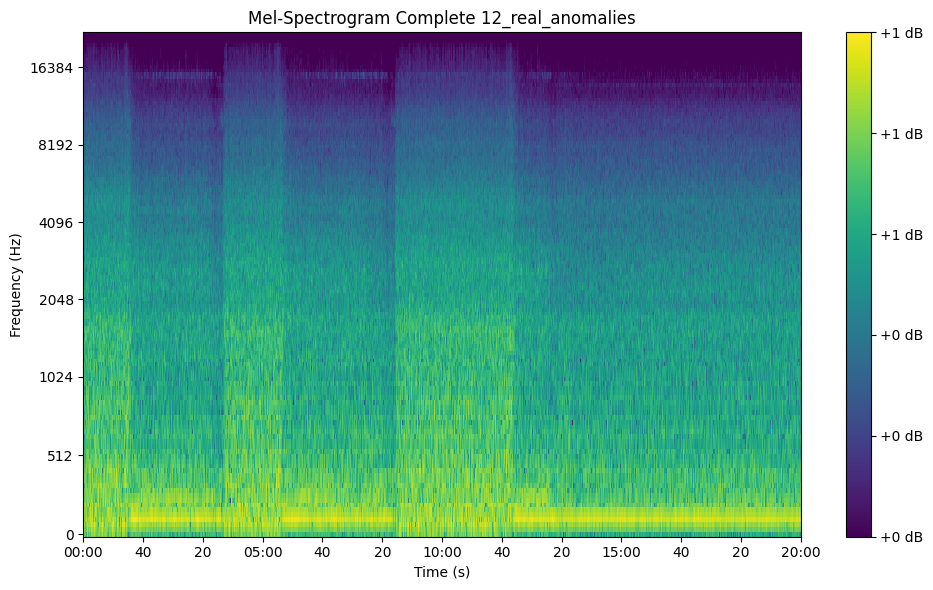

In [74]:
# Create a single plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Complete Mel-Spectrogram
img1 = librosa.display.specshow(mel_complete_12_real_anomalies, sr=sr_complete_12_real_anomalies, x_axis='time', y_axis='mel', cmap='viridis', ax=ax)
ax.set(title='Mel-Spectrogram Complete 12_real_anomalies', xlabel='Time (s)', ylabel='Frequency (Hz)')

# Set the x-axis to display only specified part of spectrogram (in seconds)
# ax.set_xlim([14, 28])

# Define a custom function to format the x-axis labels with MM:SS only at the beginning of each minute
def format_time(x, pos):
    minutes = int(x // 60)
    seconds = int(x % 60)
    # Show "MM:SS" at the start of each new displayed minute, then only seconds
    if x == ax.get_xlim()[0] or seconds == 0:
        return f"{minutes:02d}:{seconds:02d}"
    else:
        return f"{seconds:02d}"

# Apply the formatter to the x-axis
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=15))  # Set 15 ticks
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_time))

# Set color bar for dB scale
fig.colorbar(img1, ax=ax, format='%+2.0f dB')

# Adjust layout
plt.tight_layout()
plt.savefig('../../Data/mel/mel_spectrogram_12_real_anomalies_complete.png')
plt.show()

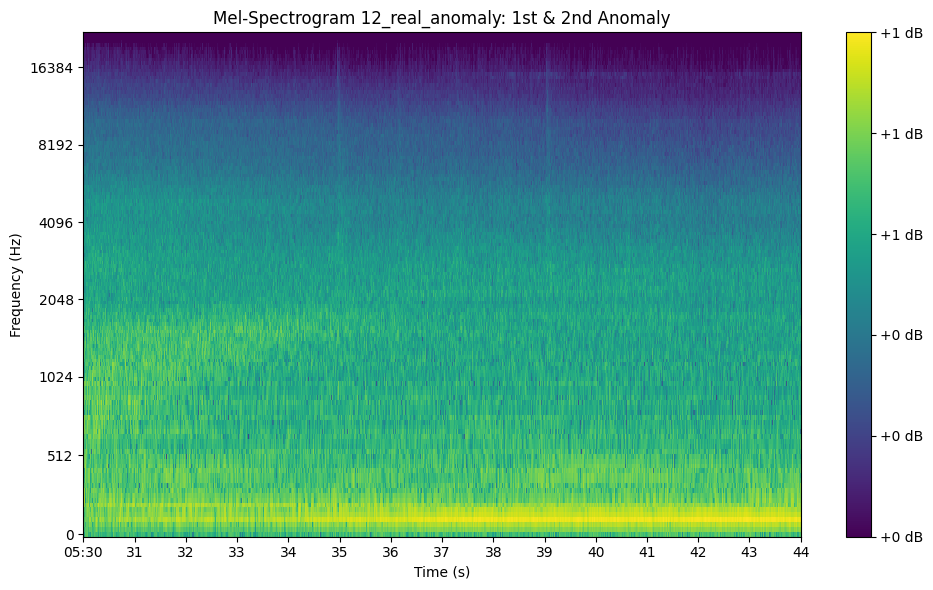

In [75]:
# Create a single plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Normal Pi1
img1 = librosa.display.specshow(mel_complete_12_real_anomalies, sr=sr_complete_12_real_anomalies, x_axis='time', y_axis='mel', cmap='viridis', ax=ax)
ax.set(title='Mel-Spectrogram 12_real_anomaly: 1st & 2nd Anomaly', xlabel='Time (s)', ylabel='Frequency (Hz)')

# Set the x-axis to display only specified part of spectrogram (in seconds)
ax.set_xlim([330, 344])

# Define a custom function to format the x-axis labels with MM:SS only at the beginning of each minute
def format_time(x, pos):
    minutes = int(x // 60)
    seconds = int(x % 60)
    # Show "MM:SS" at the start of each new displayed minute, then only seconds
    if x == ax.get_xlim()[0] or seconds == 0:
        return f"{minutes:02d}:{seconds:02d}"
    else:
        return f"{seconds:02d}"

# Apply the formatter to the x-axis
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))  # Set ticks at every 1 second
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_time))

# Set color bar for dB scale
fig.colorbar(img1, ax=ax, format='%+2.0f dB')

# Adjust layout
plt.tight_layout()
plt.show()

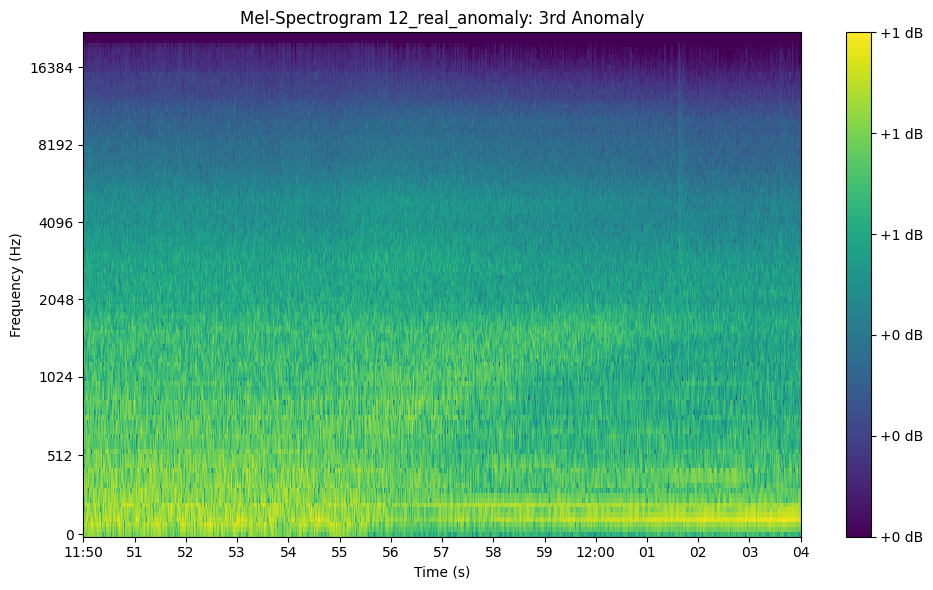

In [76]:
# Create a single plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Normal Pi1
img1 = librosa.display.specshow(mel_complete_12_real_anomalies, sr=sr_complete_12_real_anomalies, x_axis='time', y_axis='mel', cmap='viridis', ax=ax)
ax.set(title='Mel-Spectrogram 12_real_anomaly: 3rd Anomaly', xlabel='Time (s)', ylabel='Frequency (Hz)')

# Set the x-axis to display only specified part of spectrogram (in seconds)
ax.set_xlim([710, 724])

# Define a custom function to format the x-axis labels with MM:SS only at the beginning of each minute
def format_time(x, pos):
    minutes = int(x // 60)
    seconds = int(x % 60)
    # Show "MM:SS" at the start of each new displayed minute, then only seconds
    if x == ax.get_xlim()[0] or seconds == 0:
        return f"{minutes:02d}:{seconds:02d}"
    else:
        return f"{seconds:02d}"

# Apply the formatter to the x-axis
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))  # Set ticks at every 1 second
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_time))

# Set color bar for dB scale
fig.colorbar(img1, ax=ax, format='%+2.0f dB')

# Adjust layout
plt.tight_layout()
plt.show()

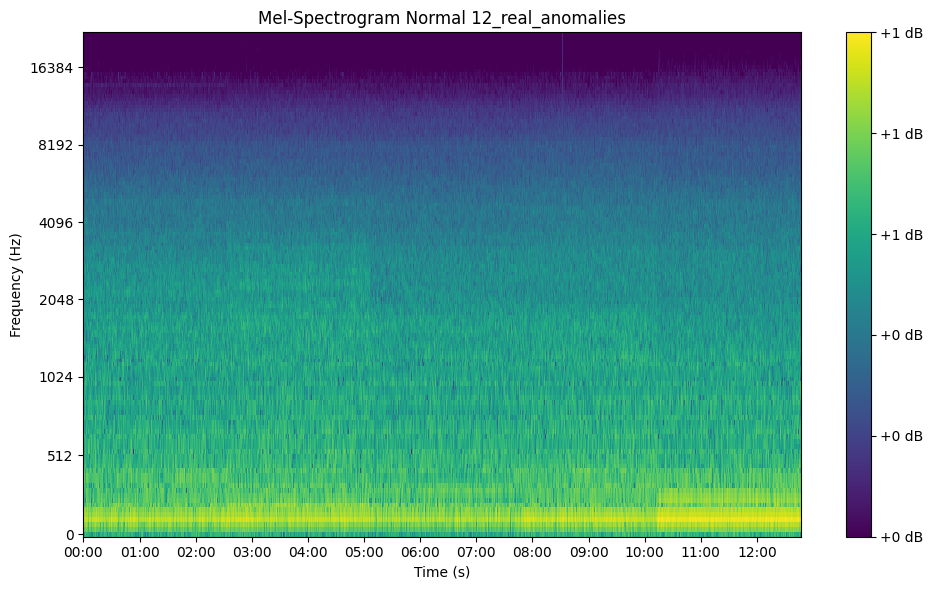

In [77]:
# Create a single plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Normal Mel-Spectrogram
img1 = librosa.display.specshow(mel_normal_12_real_anomalies, sr=sr_normal_12_real_anomalies, x_axis='time', y_axis='mel', cmap='viridis', ax=ax)
ax.set(title='Mel-Spectrogram Normal 12_real_anomalies', xlabel='Time (s)', ylabel='Frequency (Hz)')

# Set the x-axis to display only specified part of spectrogram (in seconds)
# ax.set_xlim([14, 28])

# Define a custom function to format the x-axis labels with MM:SS only at the beginning of each minute
def format_time(x, pos):
    minutes = int(x // 60)
    seconds = int(x % 60)
    # Show "MM:SS" at the start of each new displayed minute, then only seconds
    if x == ax.get_xlim()[0] or seconds == 0:
        return f"{minutes:02d}:{seconds:02d}"
    else:
        return f"{seconds:02d}"

# Apply the formatter to the x-axis
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=15))  # Set 15 ticks
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_time))

# Set color bar for dB scale
fig.colorbar(img1, ax=ax, format='%+2.0f dB')

# Adjust layout
plt.tight_layout()
plt.savefig('../../Data/mel/mel_spectrogram_12_real_anomalies_N.png')
plt.show()

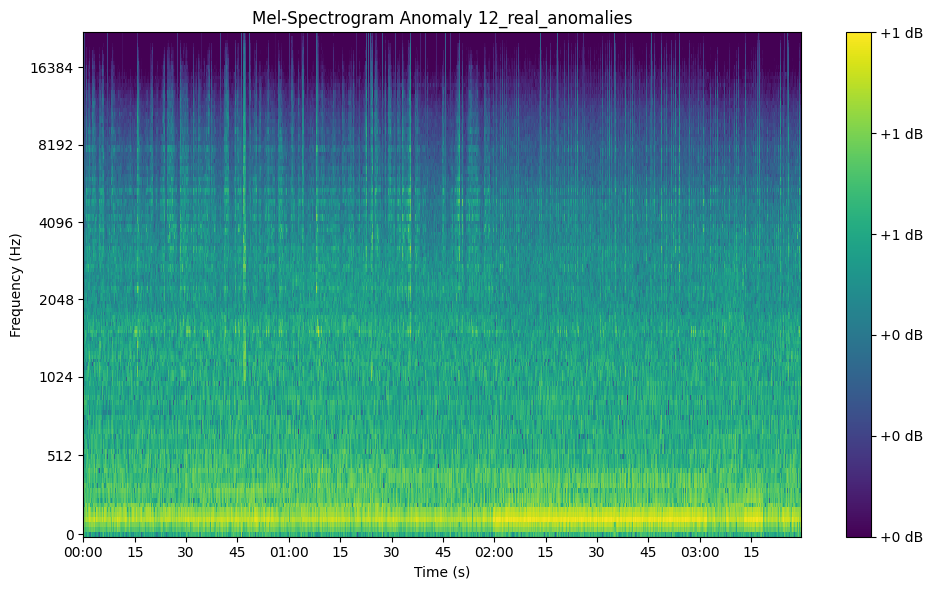

In [78]:
# Create a single plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Anomaly Mel-Spectrogram
img1 = librosa.display.specshow(mel_anomaly_12_real_anomalies, sr=sr_anomaly_12_real_anomalies, x_axis='time', y_axis='mel', cmap='viridis', ax=ax)
ax.set(title='Mel-Spectrogram Anomaly 12_real_anomalies', xlabel='Time (s)', ylabel='Frequency (Hz)')

# Set the x-axis to display only specified part of spectrogram (in seconds)
# ax.set_xlim([14, 28])

# Define a custom function to format the x-axis labels with MM:SS only at the beginning of each minute
def format_time(x, pos):
    minutes = int(x // 60)
    seconds = int(x % 60)
    # Show "MM:SS" at the start of each new displayed minute, then only seconds
    if x == ax.get_xlim()[0] or seconds == 0:
        return f"{minutes:02d}:{seconds:02d}"
    else:
        return f"{seconds:02d}"

# Apply the formatter to the x-axis
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=15))  # Set 15 ticks
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_time))

# Set color bar for dB scale
fig.colorbar(img1, ax=ax, format='%+2.0f dB')

# Adjust layout
plt.tight_layout()
plt.savefig('../../Data/mel/mel_spectrogram_12_real_anomalies_A.png')
plt.show()

Visualizing frames for anomalous sounds...


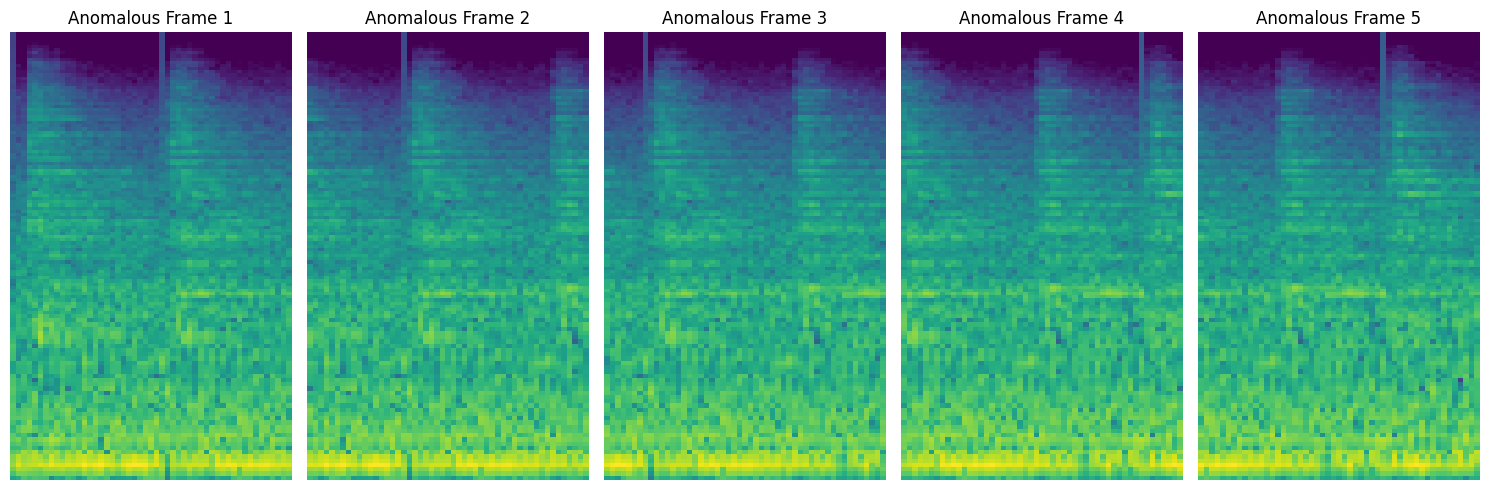

In [79]:
# Visualize anomalous frames
print("Visualizing frames for anomalous sounds...")
plot_frames(frames_anomaly_12_real_anomalies, num_frames=5, title_prefix="Anomalous Frame")

Visualizing frames for normal sounds...


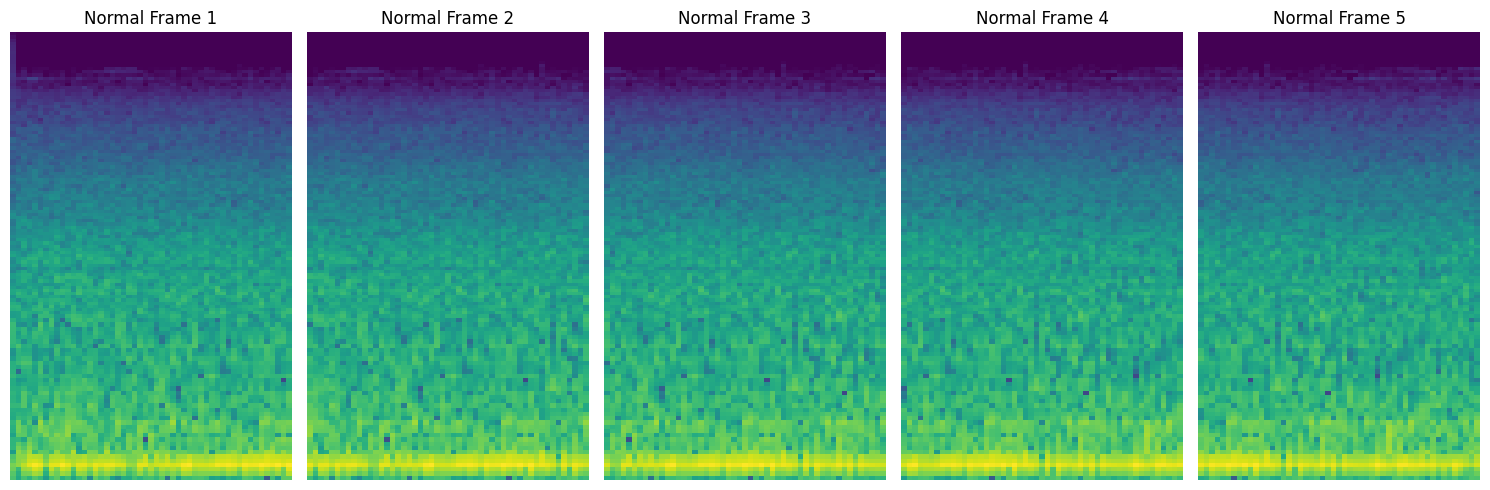

In [80]:
# Visualize normal frames
print("Visualizing frames for normal sounds...")
plot_frames(frames_normal_12_real_anomalies, num_frames=5, title_prefix="Normal Frame")